<a href="https://colab.research.google.com/github/Yaseerkhan001/Bike-sharing-demand-predication/blob/main/ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns                

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bike sharing demand prediction/SeoulBikeData.csv',encoding = "unicode_escape")

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# 1. Null Values Operation

### 1.2 Counting the null values 

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#2 Visualization and EDA

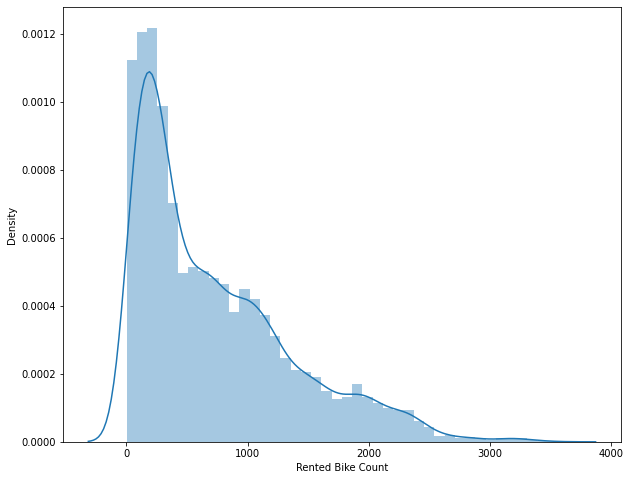

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
sns.distplot(df['Rented Bike Count'])

##2.1 The distribution of 'count' is skewed to the left. For the better performance of regression model, use sqrt transformation.

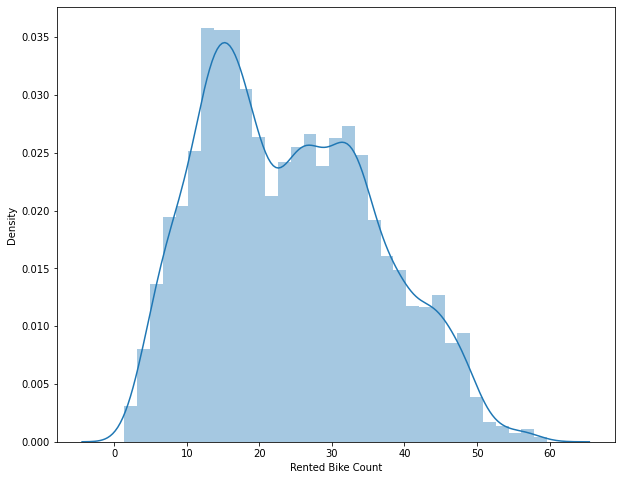

In [ ]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

It's more closer to normalization than before

In [ ]:
df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

## 2.2 


In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

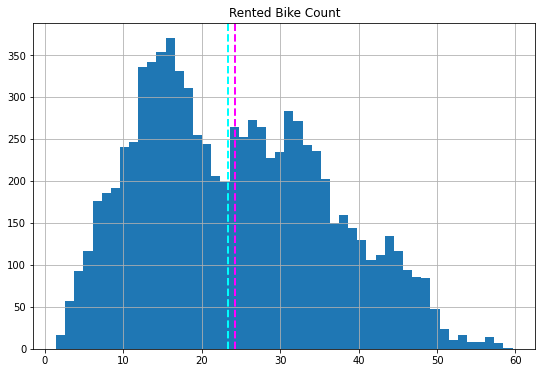

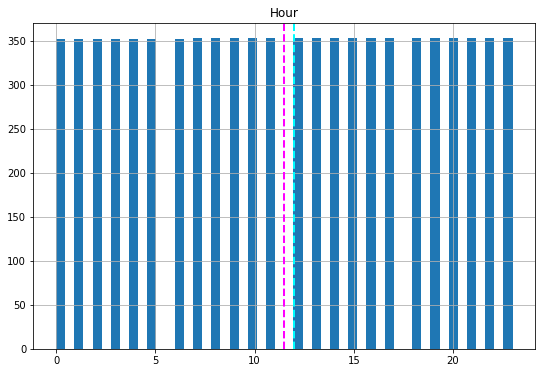

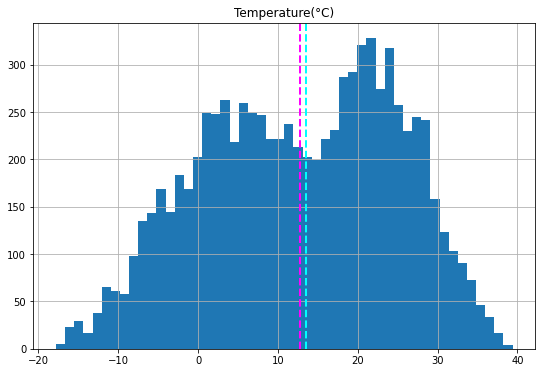

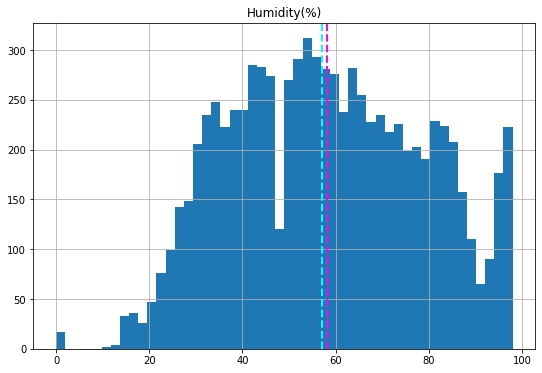

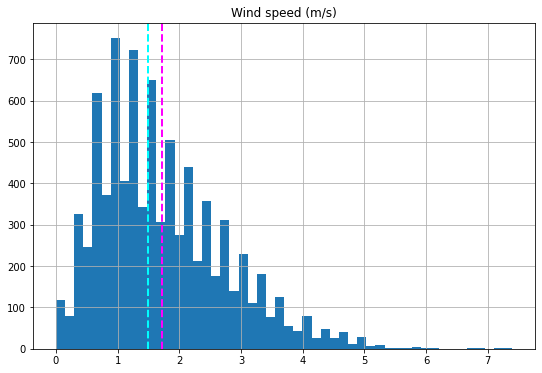

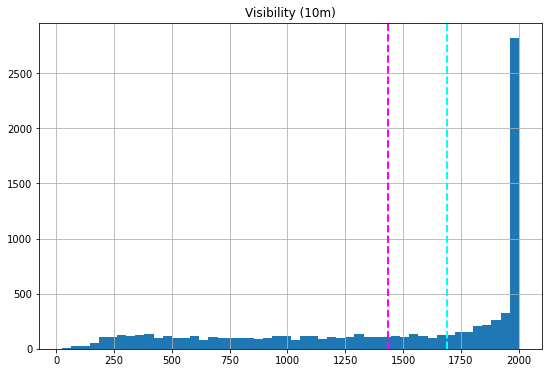

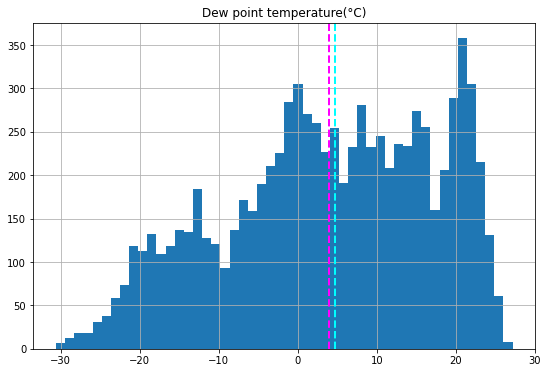

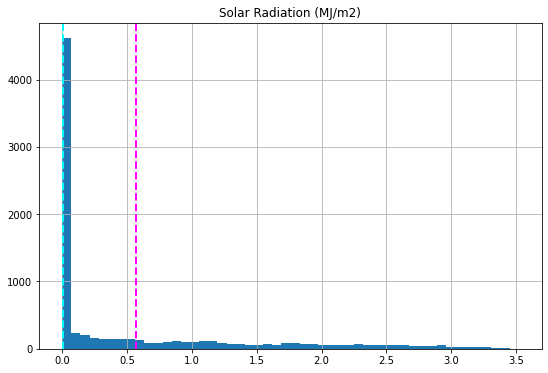

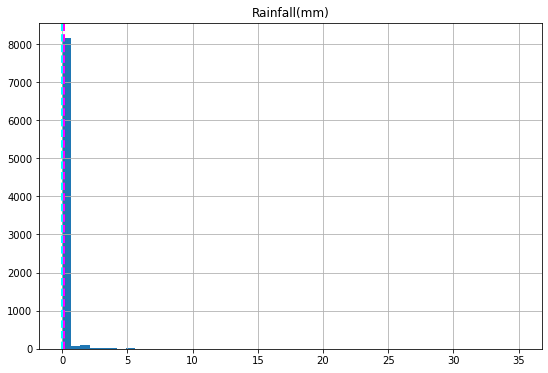

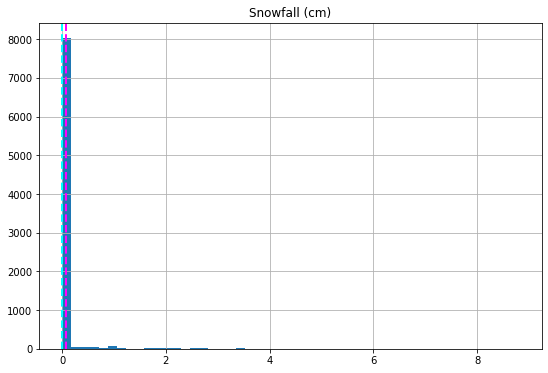

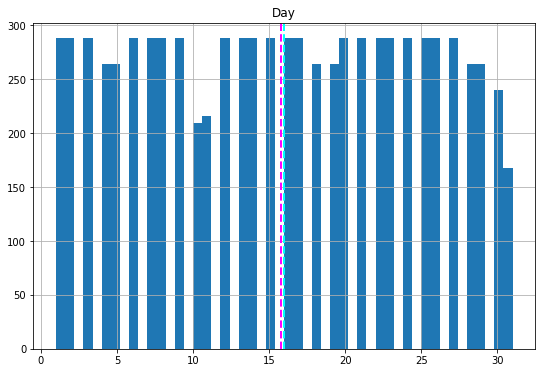

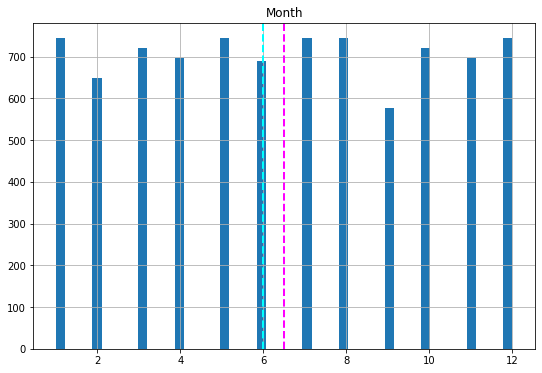

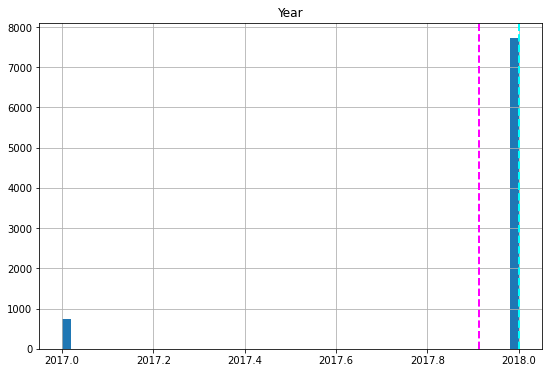

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

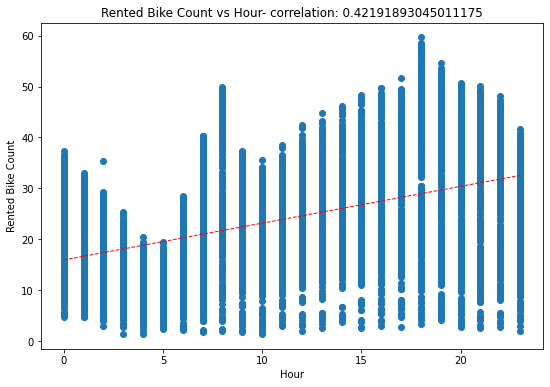

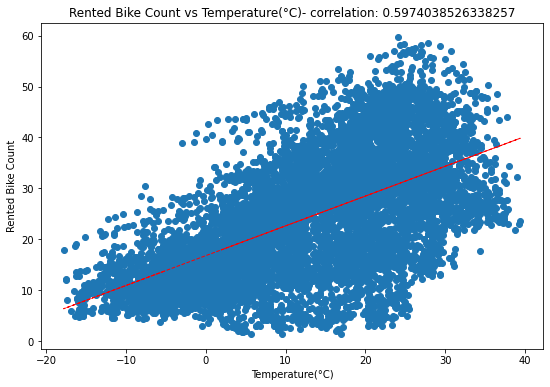

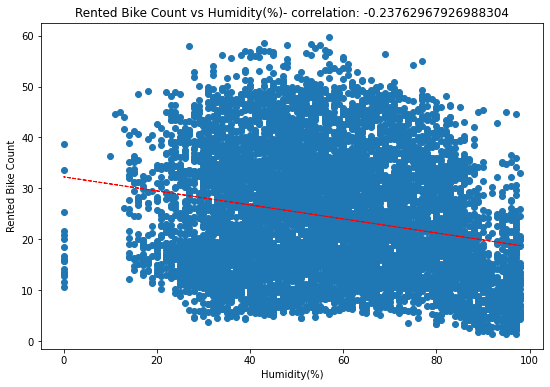

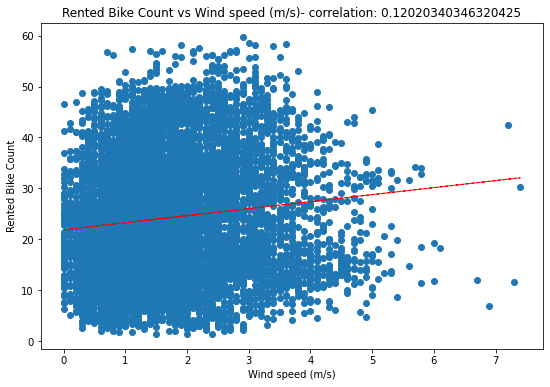

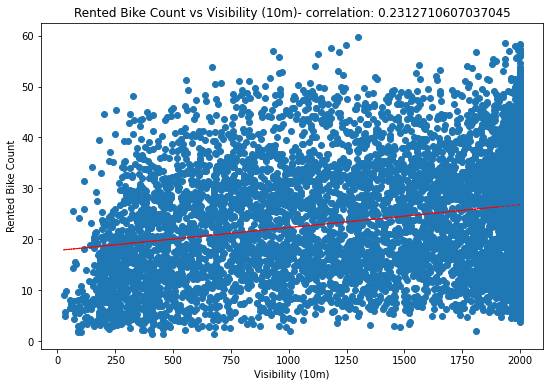

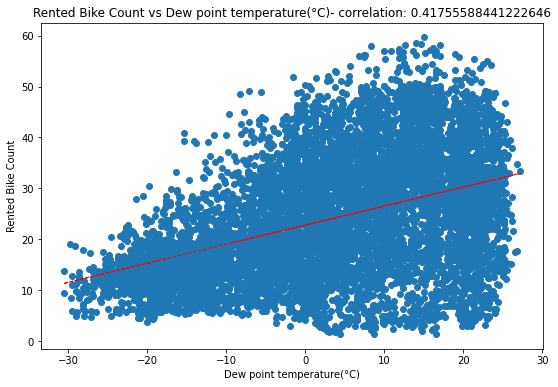

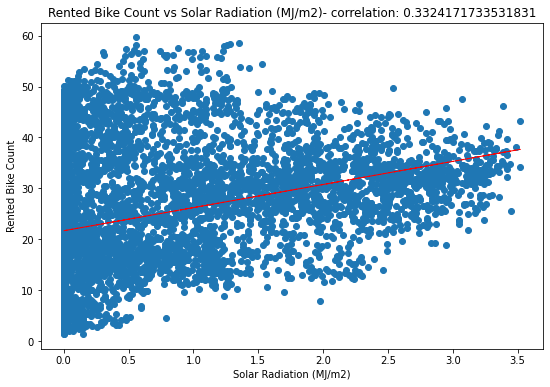

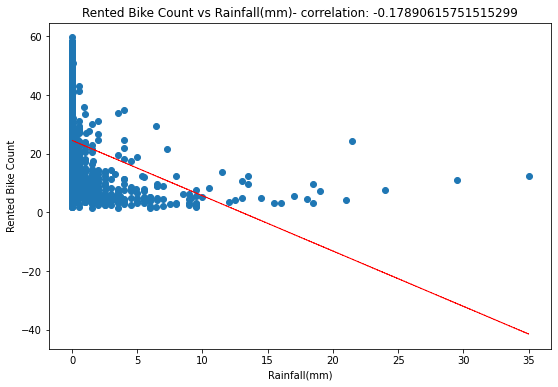

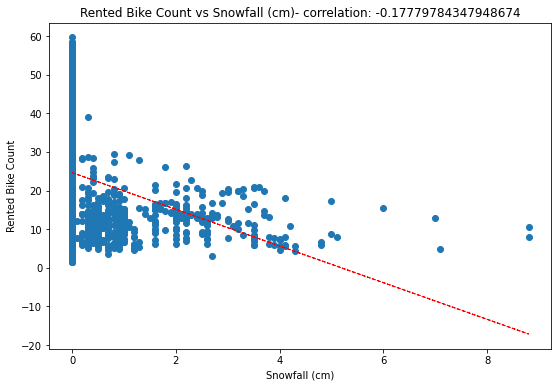

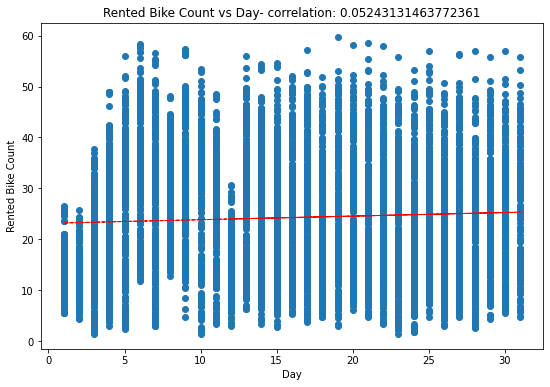

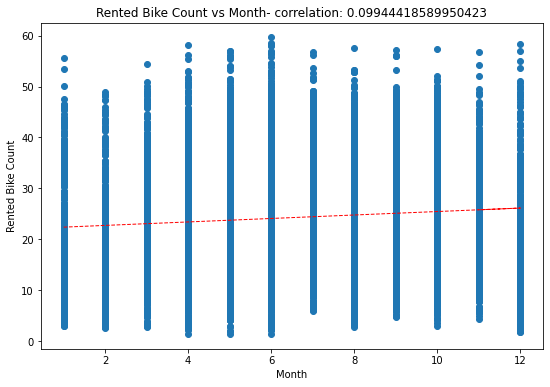

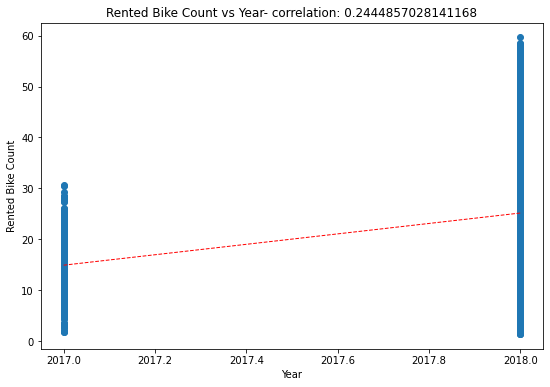

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

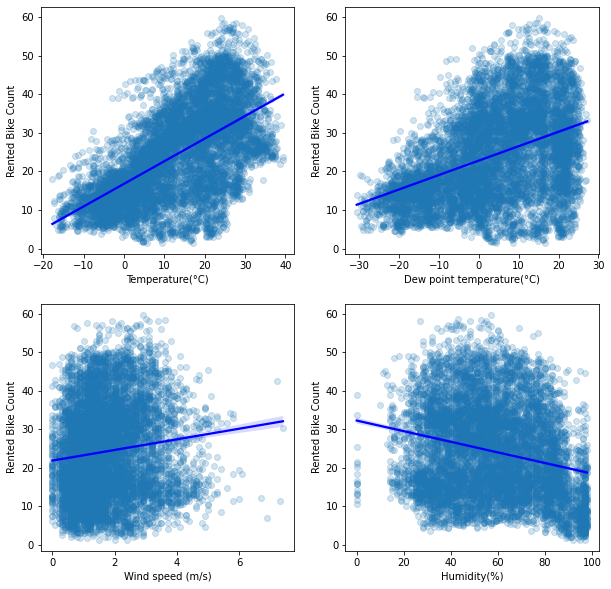

In [ ]:
# mpl.rc('font', size=11)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,10)

sns.regplot(x='Temperature(°C)', y='Rented Bike Count', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'}, ax=axes[0, 0])
sns.regplot(x='Dew point temperature(°C)', y='Rented Bike Count', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'}, ax=axes[0, 1])
sns.regplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'}, ax=axes[1,0])
sns.regplot(x='Humidity(%)', y='Rented Bike Count', data=df, scatter_kws={'alpha':0.2}, line_kws={'color':'blue'}, ax=axes[1,1])

# Observation


*   As Temperature(°C) and Dew point temperature(°C) increase, the amount of Bike rental increases
*   The lower the humidity, the higher the number of Bike rentals.
*   The stronger the wind speed, the higher the number of Bike rentals.


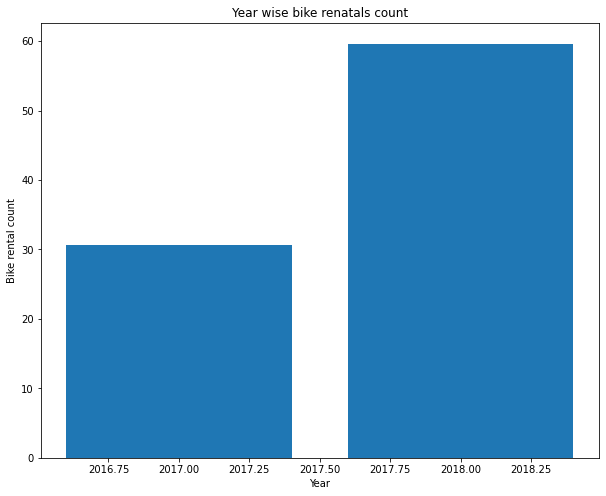

In [ ]:
plt.bar(df['Year'],df['Rented Bike Count'])
plt.xlabel("Year")
plt.ylabel("Bike rental count")
plt.title("Year wise bike renatals count")
plt.show()

# Observation
**Compared to 2017, the number of bike sharing increased**

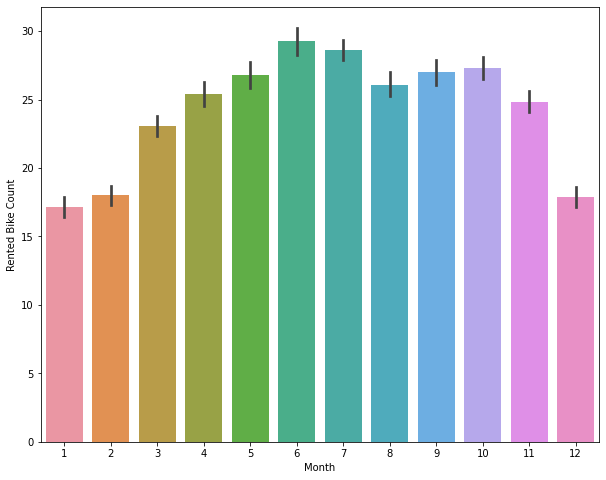

In [ ]:
sns.barplot(x='Month', y='Rented Bike Count', data=df)

# Observation:
Bike sharing volume peaks in January, then gradually increases, peaks in July, and then declines again. I guess it's caused from weather. I think people will be reluctant to ride a bike in a cold season like winter.

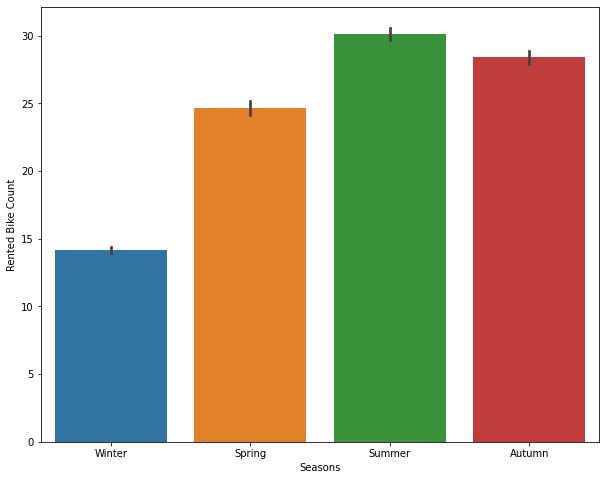

In [ ]:
sns.barplot(x='Seasons', y='Rented Bike Count', data=df)

# Observation:
Maximun number of bikes were rented on summers season

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Day', 'Month', 'Year'],
      dtype='object')

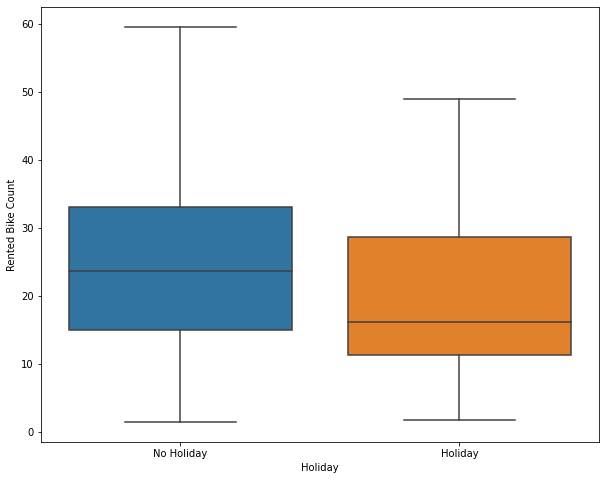

In [ ]:
sns.boxplot(x='Holiday', y='Rented Bike Count', data=df)


Observations:
The demand of rental bikes are too high on No holidays as compared to Holiday

In [ ]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,15.937377,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,2017
1,14.282857,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,2017


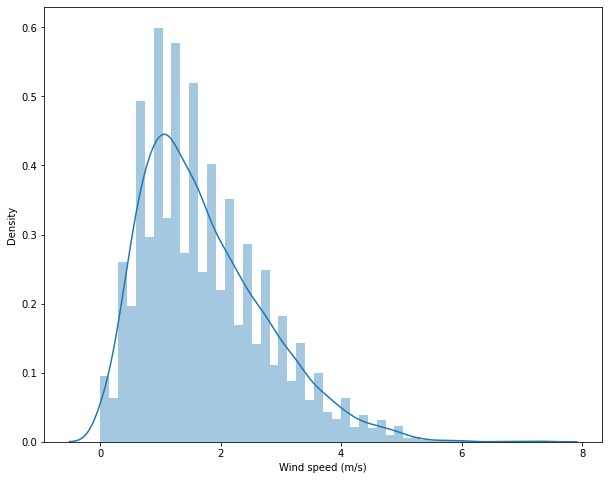

In [ ]:
sns.distplot(df['Wind speed (m/s)'])



Observation: In the case of 'windspeed' feature, it looks like there are lots of missing value

In [ ]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,15.937377,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,2017
1,14.282857,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,1,2017


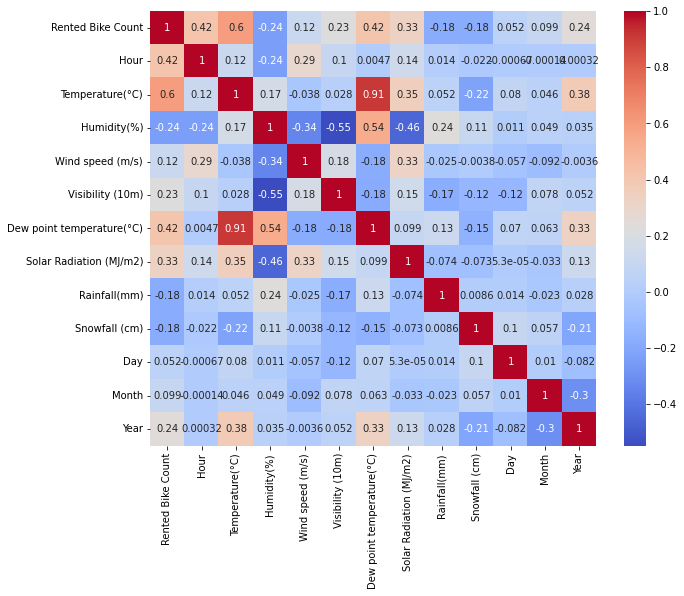

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

As we can see from the heatmap the columns Dew point temperature and temperature are highly correlated.

In [ ]:
#Droping Dew point temperature(°C) from dataset df as it is highly correlated to the Temperature.
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

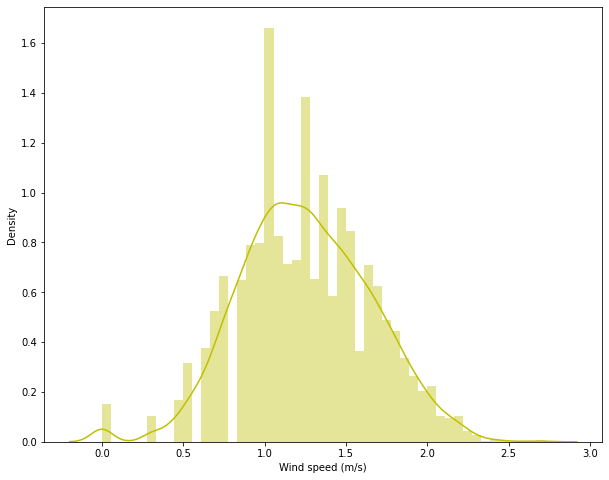

In [ ]:
# plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['Wind speed (m/s)']),color="y")

In [ ]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,15.937377,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,12,1,2017
1,14.282857,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,12,1,2017


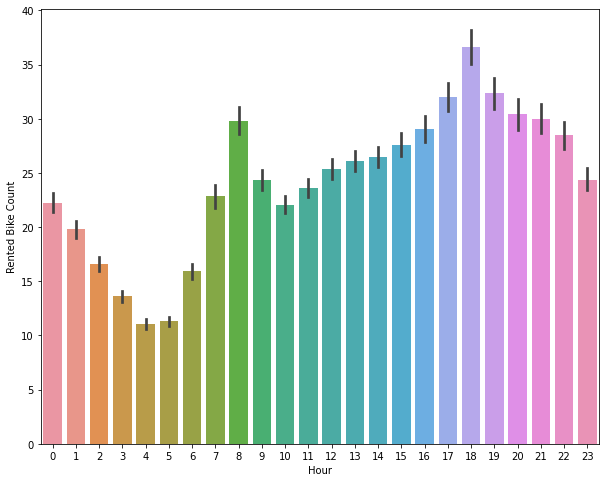

In [ ]:
sns.barplot(x='Hour', y='Rented Bike Count', data=df)


Conclusion:

1.   When checking the distribution, the target value is biased toward 0, so it must 
be changed to a normal distribution through sqrt transformation.
2.   You can create new features by dividing a date feature into parts.
3.   When solar radiatio,snowfall and rainfall is 0 the demand of bike sharing is too high.


## Feature Engineering

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
# Droping Date column
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.groupby('Functioning Day').sum()['Rented Bike Count']

Zero bikes were rented on Non-Functioning Day. So we can remove all entries from non functioning day and then can remove the functioning day column too.

In [ ]:
df=df.drop(df[df['Functioning Day'] == 'No'].index) 
df.drop(['Functioning Day'], axis = 1,inplace = True)

In [ ]:
df['Seasons'] = df['Seasons'].map({'Winter':1,'Spring':2,'Summer':3,'Autumn':4})
df['Holiday'] = df['Holiday'].map({'No Holiday':0,'Holiday':1})


In [ ]:
x = list(set(df.columns)-{"Rented Bike Count"})
X = df[x] 

In [ ]:
w = np.sqrt(df['Rented Bike Count'])
y = df['Rented Bike Count'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(6348, 13)
(2117, 13)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = [
          ['Linear Regression', LinearRegression()],
          ['Lasso', Lasso()],
          ['Ridge', Ridge()],
          ] 
         

In [ ]:
model_eveluation_metrices =[]
for name, model in models:
    working_model ={}
    working_model['name'] = name
    
    model.fit(X_train, y_train)
    
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    working_model["Train_R2_Score"] = r2_score((y_train)**2, (y_pred_train**2))
    working_model["Test_R2_Score"] = r2_score((y_test)**2,(y_pred_test)**2)
    print( f"{name} coef :{model.coef_}" )

    
    model_eveluation_metrices.append(working_model)

Linear Regression coef :[-1.82948707 -0.66358834 -0.12276398  6.04686692 -0.12538254 -0.37687166
 -3.57129167 -0.69792263  0.12014472 -0.31124376 -0.07317269  2.79136407
  3.52292956]
Lasso coef :[-0.98608684 -0.          0.          5.0716268   0.          0.
 -2.1306907   0.          0.          0.         -0.          1.80668194
  2.89112436]
Ridge coef :[-1.82930338 -0.66344279 -0.12233748  6.04475345 -0.12497147 -0.3760854
 -3.56890881 -0.69616711  0.12007702 -0.31004318 -0.07359686  2.79085893
  3.52282731]


In [ ]:
model_eveluation_metrices_df = pd.DataFrame(model_eveluation_metrices)
model_eveluation_metrices_df

,name,Train_R2_Score,Test_R2_Score
0,Linear Regression,0.547159,0.580149
1,Lasso,0.492930,0.525347
2,Ridge,0.547134,0.580133


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(6772, 13)
(1693, 13)


In [ ]:
models = [ ['Decision Tree Regressor', DecisionTreeRegressor()],
          ['XG Boost Regressor', xgb.XGBRegressor()],
          ['Gradient Boosting Regressor', GradientBoostingRegressor()],
          ]

In [ ]:
model_eveluation_metrices =[]
for name, model in models:
    working_model ={}
    working_model['name'] = name
    
    model.fit(X_train, y_train)
    
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    working_model["Train_R2_Score"] = r2_score(y_train, y_pred_train)
    working_model["Test_R2_Score"] = r2_score(y_test,y_pred_test)
    


    
    model_eveluation_metrices.append(working_model)

[14:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_eveluation_metrices_df = pd.DataFrame(model_eveluation_metrices)
model_eveluation_metrices_df

,name,Train_R2_Score,Test_R2_Score
0,Decision Tree Regressor,1.000000,0.779819
1,XG Boost Regressor,0.884774,0.868984
2,Gradient Boosting Regressor,0.885913,0.870476


In [ ]:
# creating parameters

learning_rate = [0.2,0.4,.6]
n_estimators = range(50, 400, 50)
# param_dict
param_dict = {
    'learning_rate' : learning_rate, 
    'n_estimators' : n_estimators
}

In [ ]:
### Cross validation
import warnings
warnings.filterwarnings('ignore')
XGBR = xgb.XGBRegressor()
parameters = param_dict
XGB_regressor = GridSearchCV(XGBR, parameters, scoring='r2', cv=3)
XGB_regressor.fit(X_train, y_train)

[14:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'n_estimators': range(50, 400, 50)},
             scoring='r2')

In [ ]:
print("Best parameters are  \n",XGB_regressor.best_params_)

# predit 
y_train_preds = XGB_regressor.best_estimator_.predict(X_train)
y_test_preds = XGB_regressor.best_estimator_.predict(X_test)

print("\n=========================================================\n")
Train_R2_Score = r2_score(y_train,y_train_preds)


Test_R2_Score = r2_score(y_test, y_test_preds)

print(f"Train_R2_Score  {Train_R2_Score}")
print(f"Test_R2_Score  {Test_R2_Score}")

Best parameters are  
 {'learning_rate': 0.2, 'n_estimators': 350}


Train_R2_Score  0.9322482314713392
Test_R2_Score  0.8901741080417916


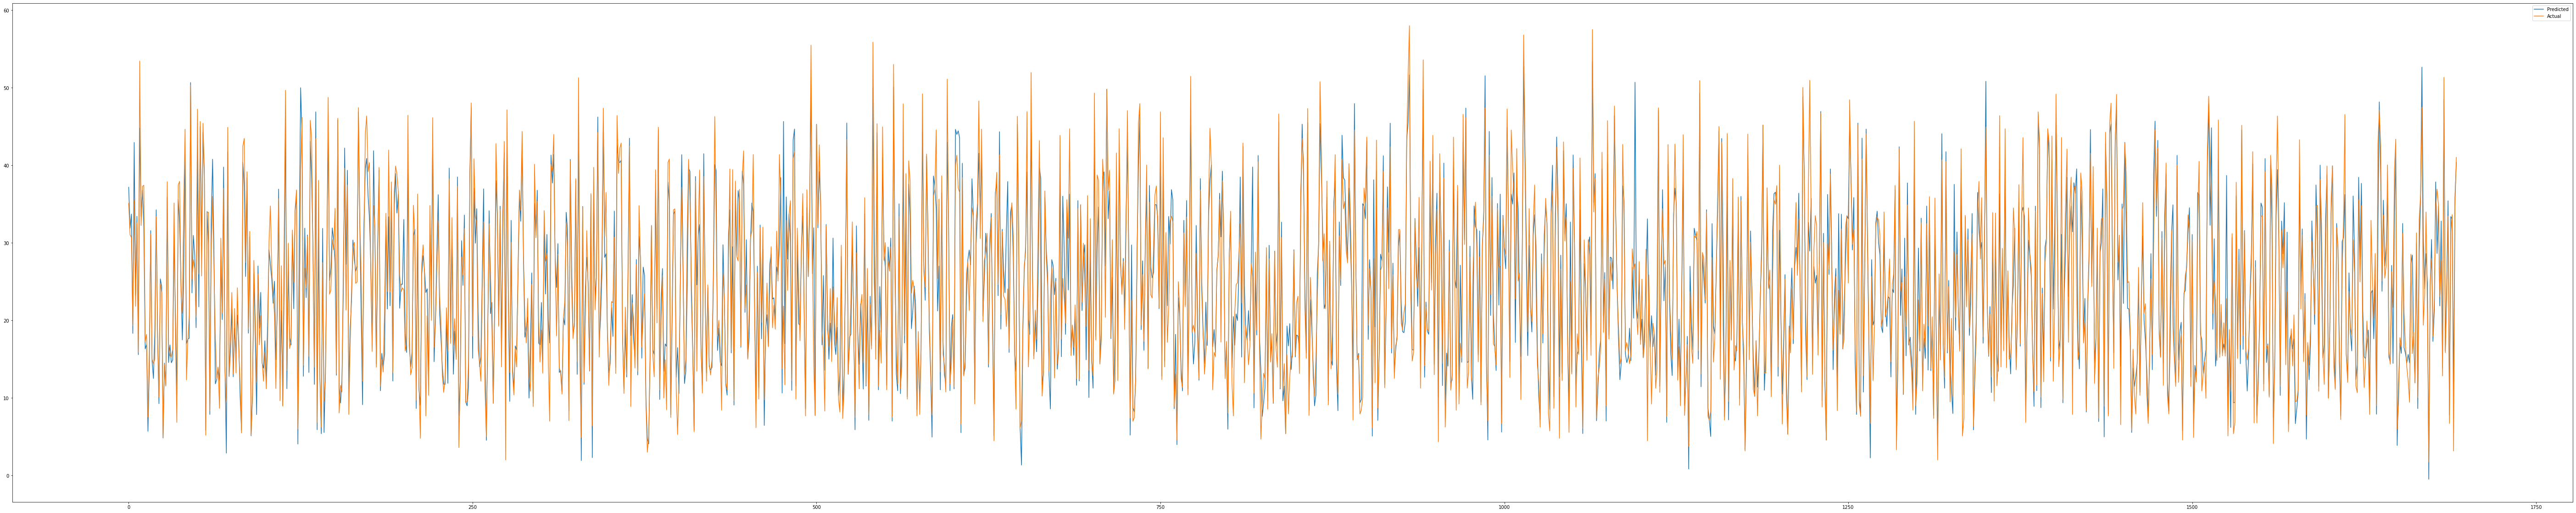

In [ ]:
plt.figure(figsize=(100,20))
plt.plot((y_test_preds))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()